# Correlation Analysis of PHYSPC (Physicians per 10,000) versus UHC Index

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np

In [2]:
with open("PHYSPC_raw_data.json","r") as f:
  uhc_json = json.load(f)

uhc_data = []
for elem in uhc_json:
  entry = {}
  entry['CountryCode'] = elem['CountryCode']
  entry['Year'] = elem['Year']
  entry['UHC Score'] = elem['Value']
  uhc_data.append(entry)

uhc = pd.DataFrame(uhc_data)
uhc = uhc.sort_values(['CountryCode','Year'],ascending=[True,False]).reset_index(drop=True)
uhc

,CountryCode,Year,UHC Score
0,AFG,2021,41.0
1,AFG,2019,42.0
2,AFG,2017,41.0
3,AFG,2015,36.0
4,AFG,2010,29.0
...,...,...,...
1353,ZWE,2017,57.0
1354,ZWE,2015,56.0
1355,ZWE,2010,46.0
1356,ZWE,2005,31.0


In [13]:
physpc_raw = pd.read_csv('217795A_ALL_LATEST.csv')

m49_table = pd.read_html('https://unstats.un.org/unsd/methodology/m49/')[0]
m49_iso = dict(zip(m49_table['M49 code'],m49_table['ISO-alpha3 code']))

physpc = physpc_raw[['DIM_TIME','DIM_GEO_CODE_M49','RATE_PER_10000_N']]
physpc['CountryCode'] = physpc['DIM_GEO_CODE_M49'].map(m49_iso)
physpc = physpc[['CountryCode','DIM_TIME','RATE_PER_10000_N']]
physpc = physpc.rename(columns={"DIM_TIME": "Year", "RATE_PER_10000_N": "PHYSPC"})
physpc = physpc.sort_values(['CountryCode','Year'],ascending=[True,False]).reset_index(drop=True).dropna()
physpc

<ipython-input-13-ce74e0b71e3a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physpc['CountryCode'] = physpc['DIM_GEO_CODE_M49'].map(m49_iso)


,CountryCode,Year,PHYSPC
0,AFG,2020,2.535
1,AFG,2019,2.140
2,AFG,2018,3.038
3,AFG,2017,2.453
4,AFG,2016,2.842
...,...,...,...
3152,ZWE,2005,1.240
3153,ZWE,2004,1.715
3154,ZWE,2000,1.267
3155,ZWE,1995,1.483


In [20]:
m49_iso

{4: 'AFG',
 248: 'ALA',
 8: 'ALB',
 12: 'DZA',
 16: 'ASM',
 20: 'AND',
 24: 'AGO',
 660: 'AIA',
 10: 'ATA',
 28: 'ATG',
 32: 'ARG',
 51: 'ARM',
 533: 'ABW',
 36: 'AUS',
 40: 'AUT',
 31: 'AZE',
 44: 'BHS',
 48: 'BHR',
 50: 'BGD',
 52: 'BRB',
 112: 'BLR',
 56: 'BEL',
 84: 'BLZ',
 204: 'BEN',
 60: 'BMU',
 64: 'BTN',
 68: 'BOL',
 535: 'BES',
 70: 'BIH',
 72: 'BWA',
 74: 'BVT',
 76: 'BRA',
 86: 'IOT',
 92: 'VGB',
 96: 'BRN',
 100: 'BGR',
 854: 'BFA',
 108: 'BDI',
 132: 'CPV',
 116: 'KHM',
 120: 'CMR',
 124: 'CAN',
 136: 'CYM',
 140: 'CAF',
 148: 'TCD',
 152: 'CHL',
 156: 'CHN',
 344: 'HKG',
 446: 'MAC',
 162: 'CXR',
 166: 'CCK',
 170: 'COL',
 174: 'COM',
 178: 'COG',
 184: 'COK',
 188: 'CRI',
 384: 'CIV',
 191: 'HRV',
 192: 'CUB',
 531: 'CUW',
 196: 'CYP',
 203: 'CZE',
 408: 'PRK',
 180: 'COD',
 208: 'DNK',
 262: 'DJI',
 212: 'DMA',
 214: 'DOM',
 218: 'ECU',
 818: 'EGY',
 222: 'SLV',
 226: 'GNQ',
 232: 'ERI',
 233: 'EST',
 748: 'SWZ',
 231: 'ETH',
 238: 'FLK',
 234: 'FRO',
 242: 'FJI',
 246

Text(0, 0.5, 'Physicians per 10,000')

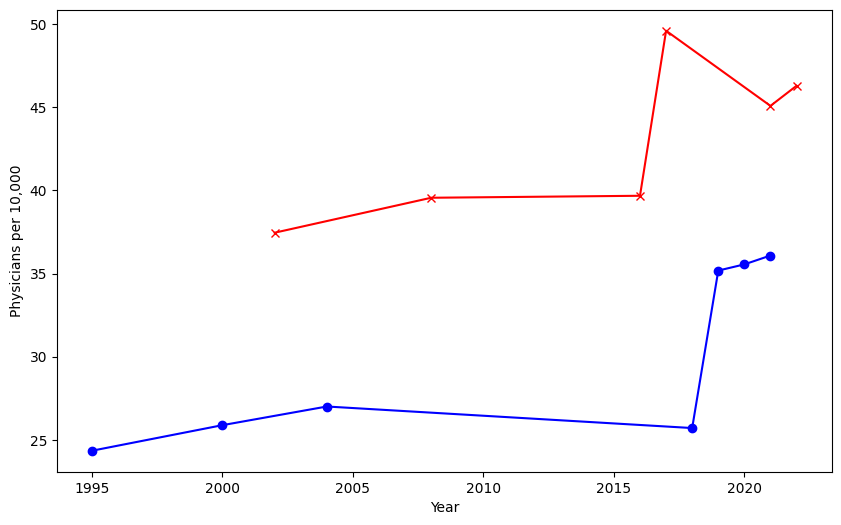

In [19]:
physpc_us = physpc[physpc['CountryCode']=='USA']
physpc_ugy = physpc[physpc['CountryCode']=='URY']

plt.figure(figsize=(10, 6))
plt.plot(physpc_us['Year'], physpc_us['PHYSPC'], label='USA', marker='o', color='blue')
plt.plot(physpc_ugy['Year'], physpc_ugy['PHYSPC'], label='URY', marker='x', color='red')
plt.xlabel('Year')
plt.ylabel('Physicians per 10,000')

In [4]:
health = pd.merge(uhc, physpc, how='inner', on=["CountryCode","Year"])
health = health.groupby('CountryCode').filter(lambda sf: len(sf) >= 3) ## Keeping only countries with at least 3 years worth of data.
health

,CountryCode,Year,UHC Score,PHYSPC
0,AFG,2019,42.0,2.140
1,AFG,2017,41.0,2.453
2,AFG,2015,36.0,2.906
3,AFG,2010,29.0,2.448
5,ALB,2019,64.0,16.511
...,...,...,...,...
779,ZWE,2017,57.0,1.794
780,ZWE,2015,56.0,1.772
781,ZWE,2010,46.0,1.258
782,ZWE,2005,31.0,1.240


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
health[['UHC_Std','PHYSPC_Std']] = scaler.fit_transform(health[['UHC Score','PHYSPC']])
health

,CountryCode,Year,UHC Score,PHYSPC,UHC_Std,PHYSPC_Std
0,AFG,2019,42.0,2.140,0.364865,0.020443
1,AFG,2017,41.0,2.453,0.351351,0.023770
2,AFG,2015,36.0,2.906,0.283784,0.028586
3,AFG,2010,29.0,2.448,0.189189,0.023717
5,ALB,2019,64.0,16.511,0.662162,0.173215
...,...,...,...,...,...,...
779,ZWE,2017,57.0,1.794,0.567568,0.016764
780,ZWE,2015,56.0,1.772,0.554054,0.016531
781,ZWE,2010,46.0,1.258,0.418919,0.011066
782,ZWE,2005,31.0,1.240,0.216216,0.010875


## Visual Inspection

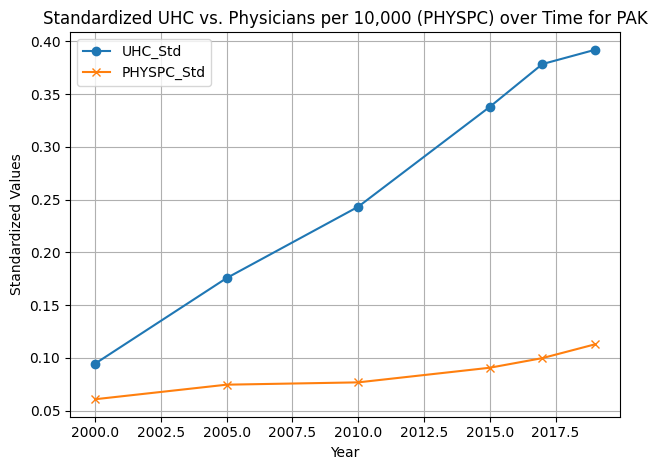

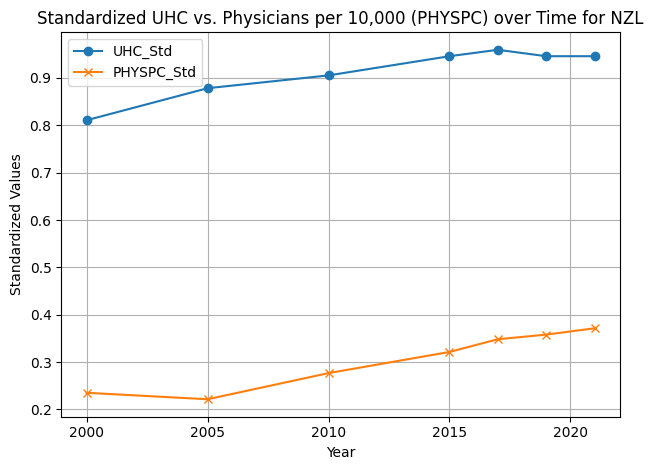

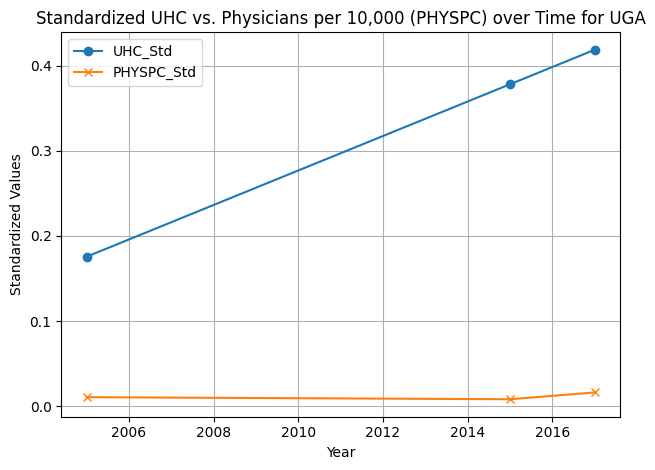

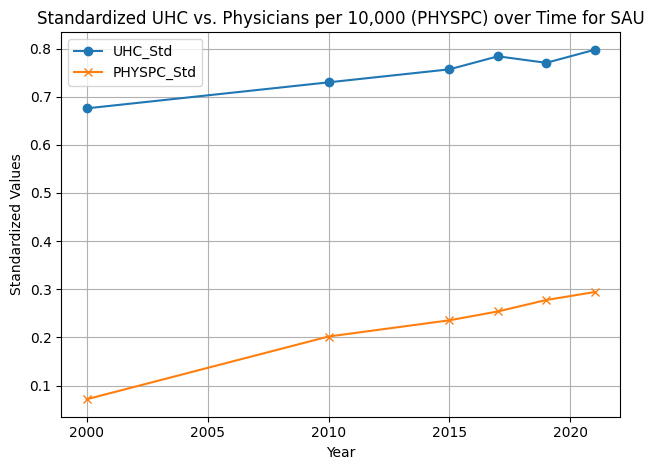

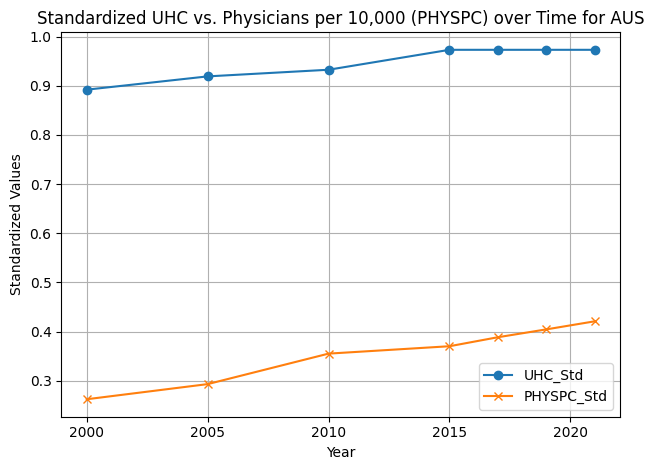

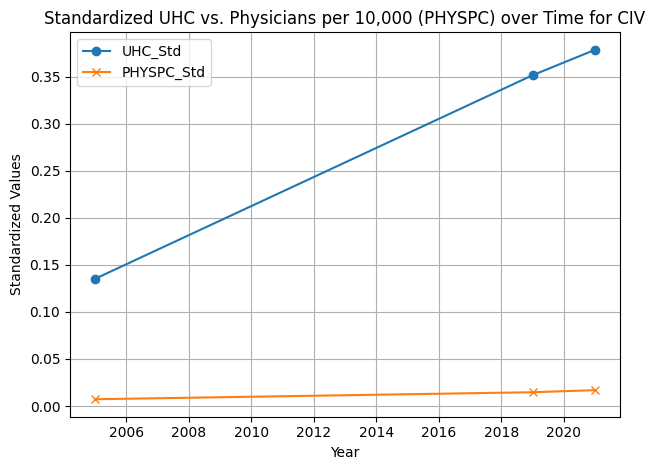

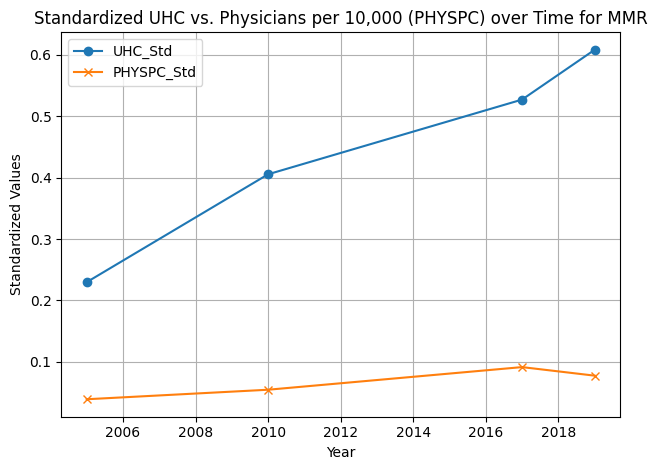

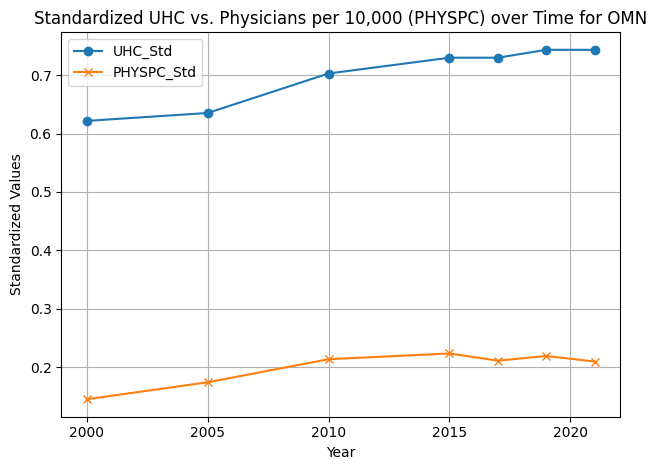

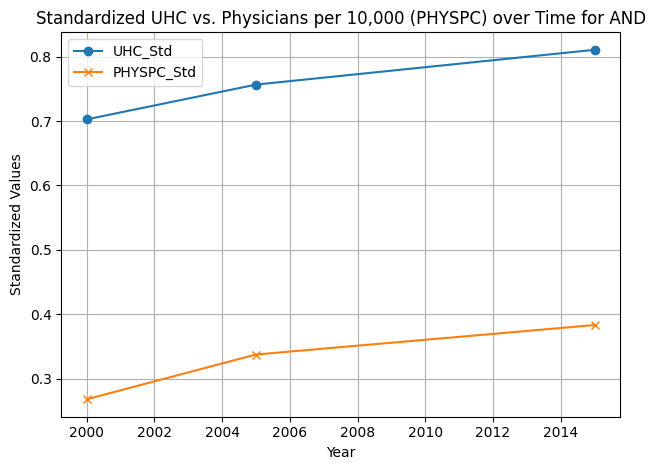

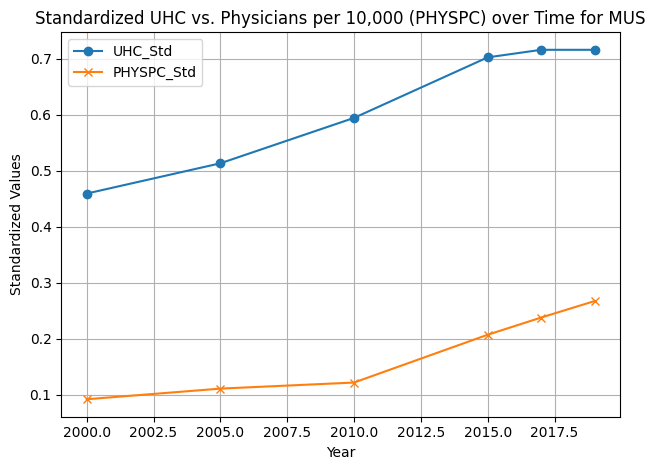

In [6]:
import random

# Randomly sample 10 countries
sampled_countries = health['CountryCode'].drop_duplicates().sample(n=10)

# Filter the DataFrame for the sampled countries
df_sampled = health[health['CountryCode'].isin(sampled_countries)]

# Loop over each sampled country and plot UHC_Std and PHYSPC_Std over time
for country in sampled_countries:
    country_data = df_sampled[df_sampled['CountryCode'] == country]

    # Plot UHC_Std and PHYSPC_Std over time
    plt.plot(country_data['Year'], country_data['UHC_Std'], label=f'UHC_Std', linestyle='-', marker='o')
    plt.plot(country_data['Year'], country_data['PHYSPC_Std'], label=f'PHYSPC_Std', linestyle='-', marker='x')

    # Add labels and title
    plt.title(f'Standardized UHC vs. Physicians per 10,000 (PHYSPC) over Time for {country}')
    plt.xlabel('Year')
    plt.ylabel('Standardized Values')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

### Grid Plot of UHC Score & PHYSPC Over Time for all Countries with at Least 3 Years of Data

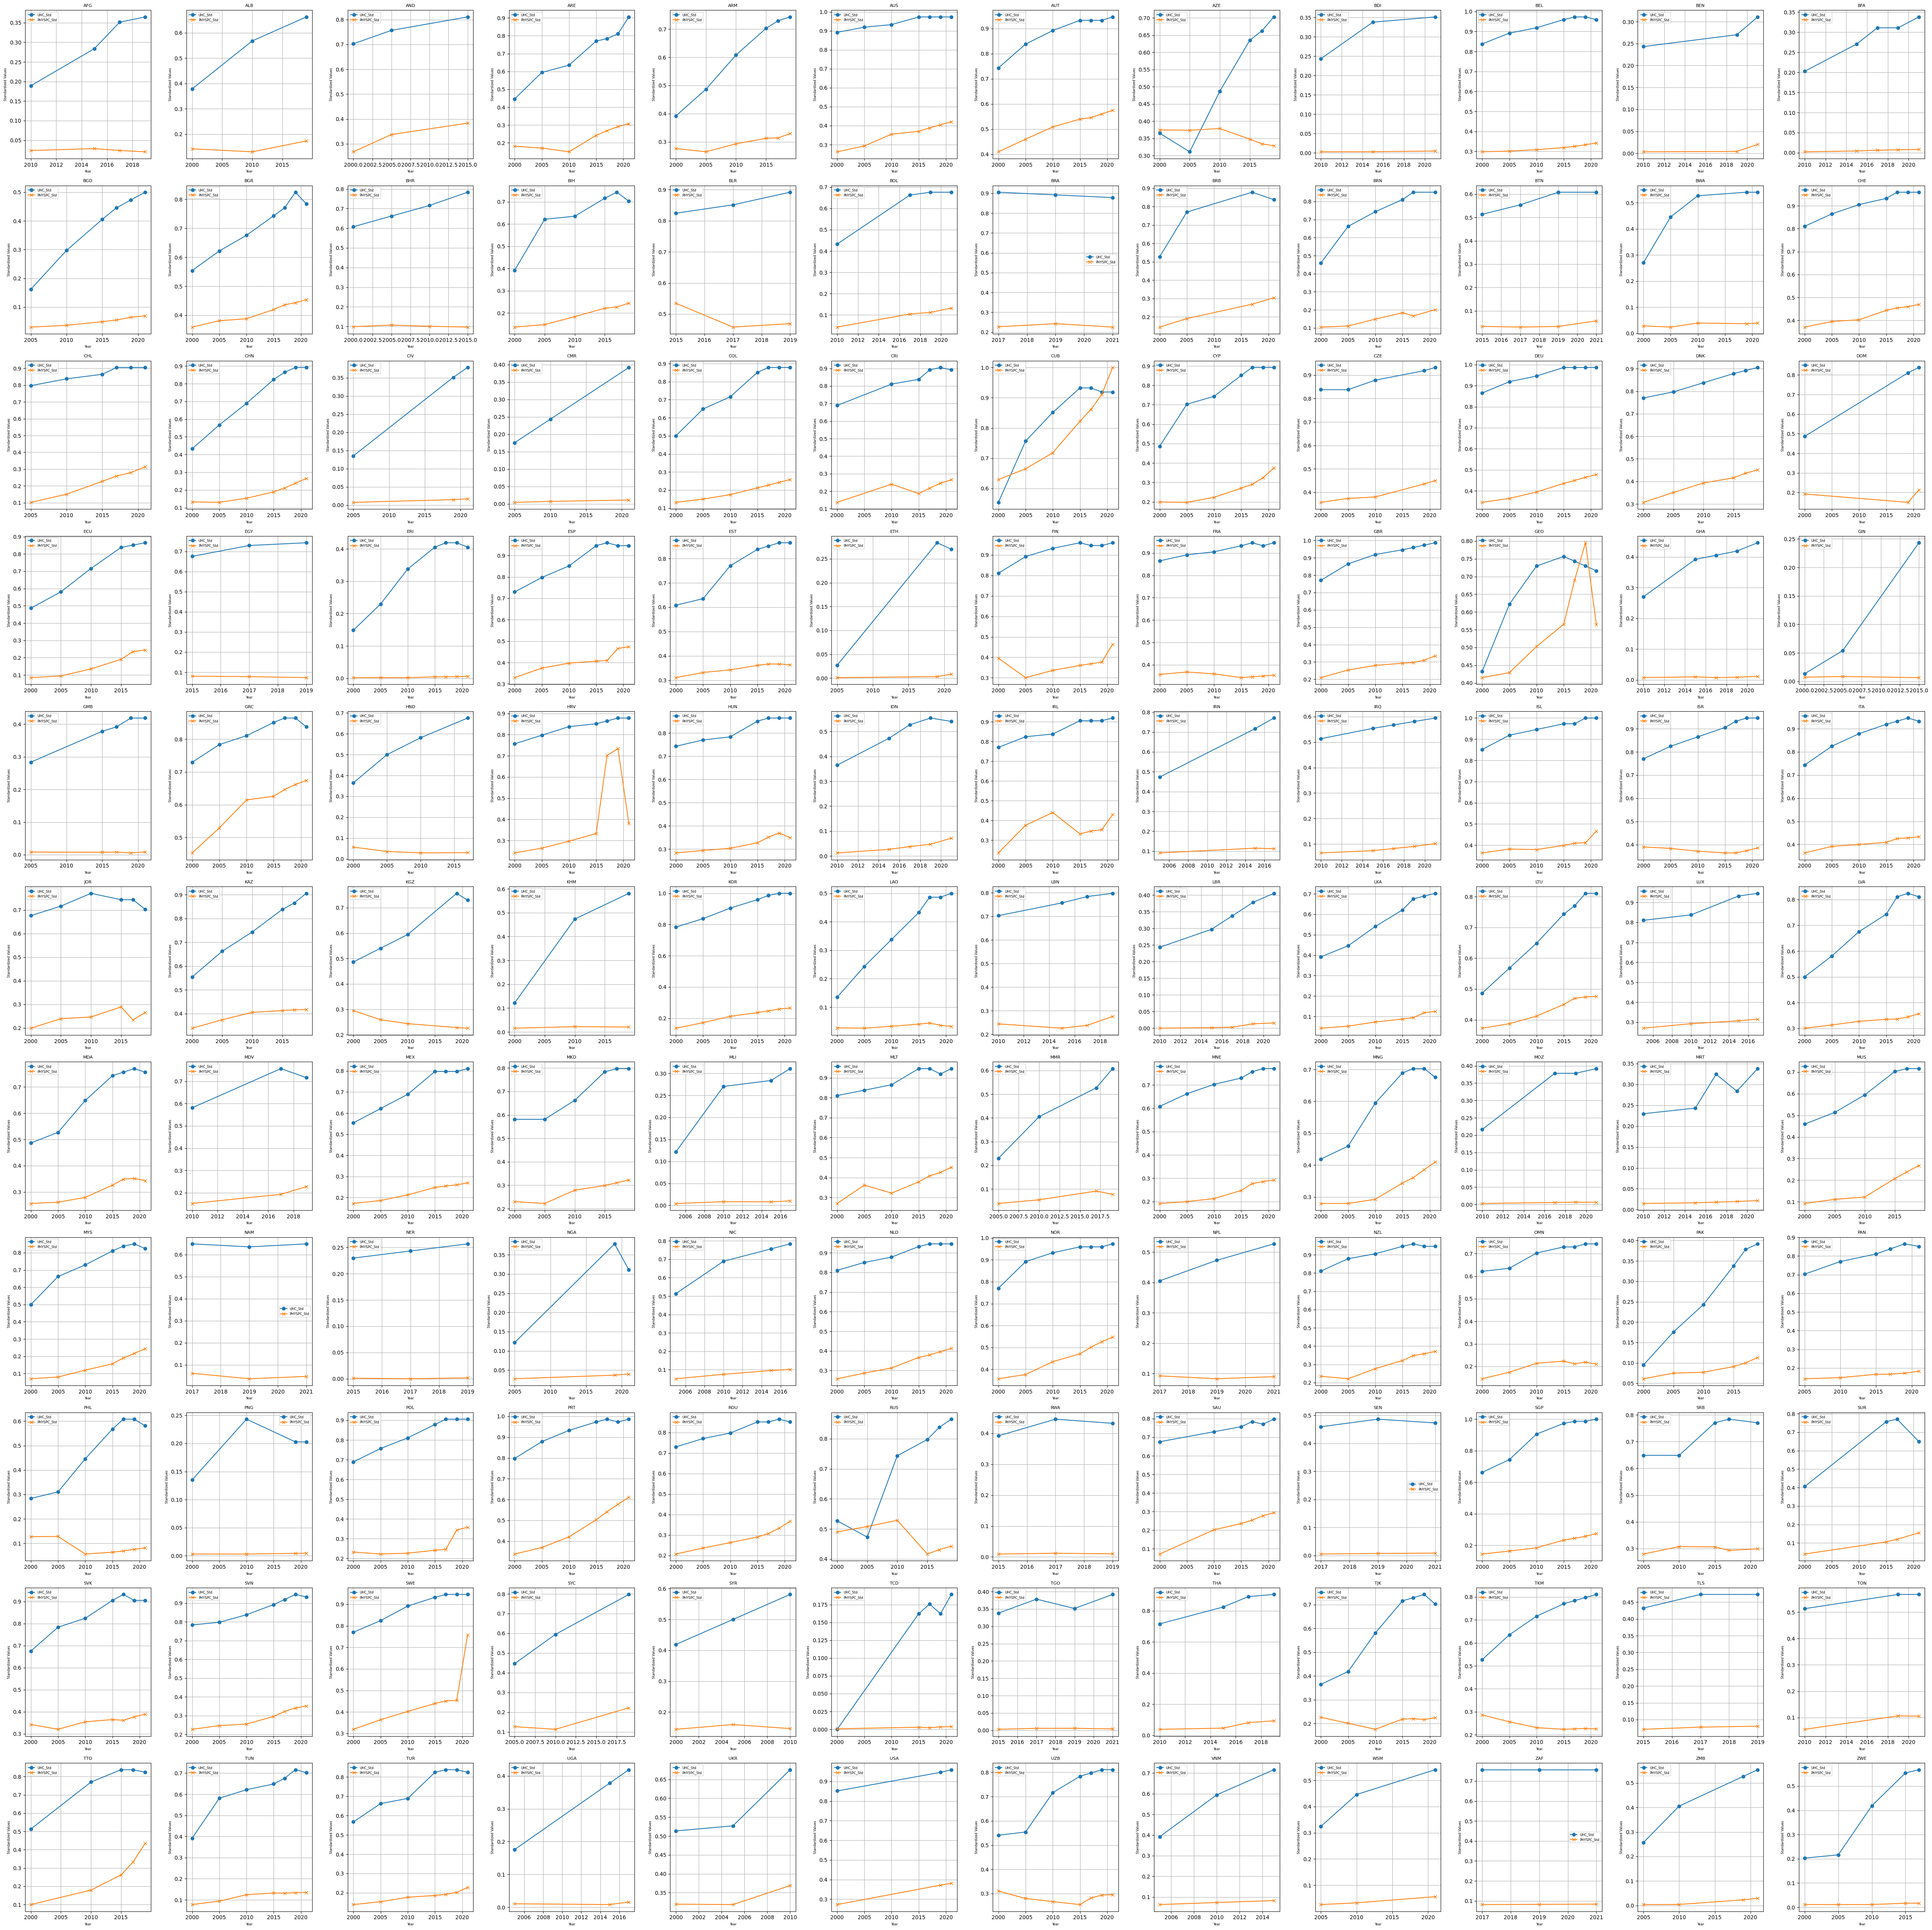

In [7]:
# Set up the figure and the grid of subplots (12x12 grid for 132 countries)
fig, axes = plt.subplots(nrows=11, ncols=12, figsize=(50, 50))

# Flatten axes array to easily loop through
axes = axes.flatten()

# Loop over each country and plot UHC_Std and PHYSPC_Std in corresponding subplot
for i, country in enumerate(health['CountryCode'].drop_duplicates()):
    country_data = health[health['CountryCode'] == country]

    # Access the corresponding subplot
    ax = axes[i]

    # Plot UHC_Std and PHYSPC_Std over time for the country
    ax.plot(country_data['Year'], country_data['UHC_Std'], label='UHC_Std', linestyle='-', marker='o')
    ax.plot(country_data['Year'], country_data['PHYSPC_Std'], label='PHYSPC_Std', linestyle='-', marker='x')

    # Set title and labels for the subplot
    ax.set_title(country, fontsize=8)
    ax.set_xlabel('Year', fontsize=6)
    ax.set_ylabel('Standardized Values', fontsize=6)
    ax.legend(fontsize=6)
    ax.grid(True)

# Adjust layout to avoid overlapping subplots
plt.tight_layout()
plt.show()

# Correlation Analysis



---



## Correlation by Country

In [8]:
country_correlations = health.groupby('CountryCode').apply(lambda sf: sf[['UHC_Std','PHYSPC_Std']].corr().iloc[0,1])
country_correlations

<ipython-input-8-c59e2a341d22>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_correlations = health.groupby('CountryCode').apply(lambda sf: sf[['UHC_Std','PHYSPC_Std']].corr().iloc[0,1])


,0
CountryCode,
AFG,-0.351556
ALB,0.555910
AND,0.993016
ARE,0.860899
ARM,0.917604
...,...
VNM,0.993607
WSM,0.928648
ZAF,NaN


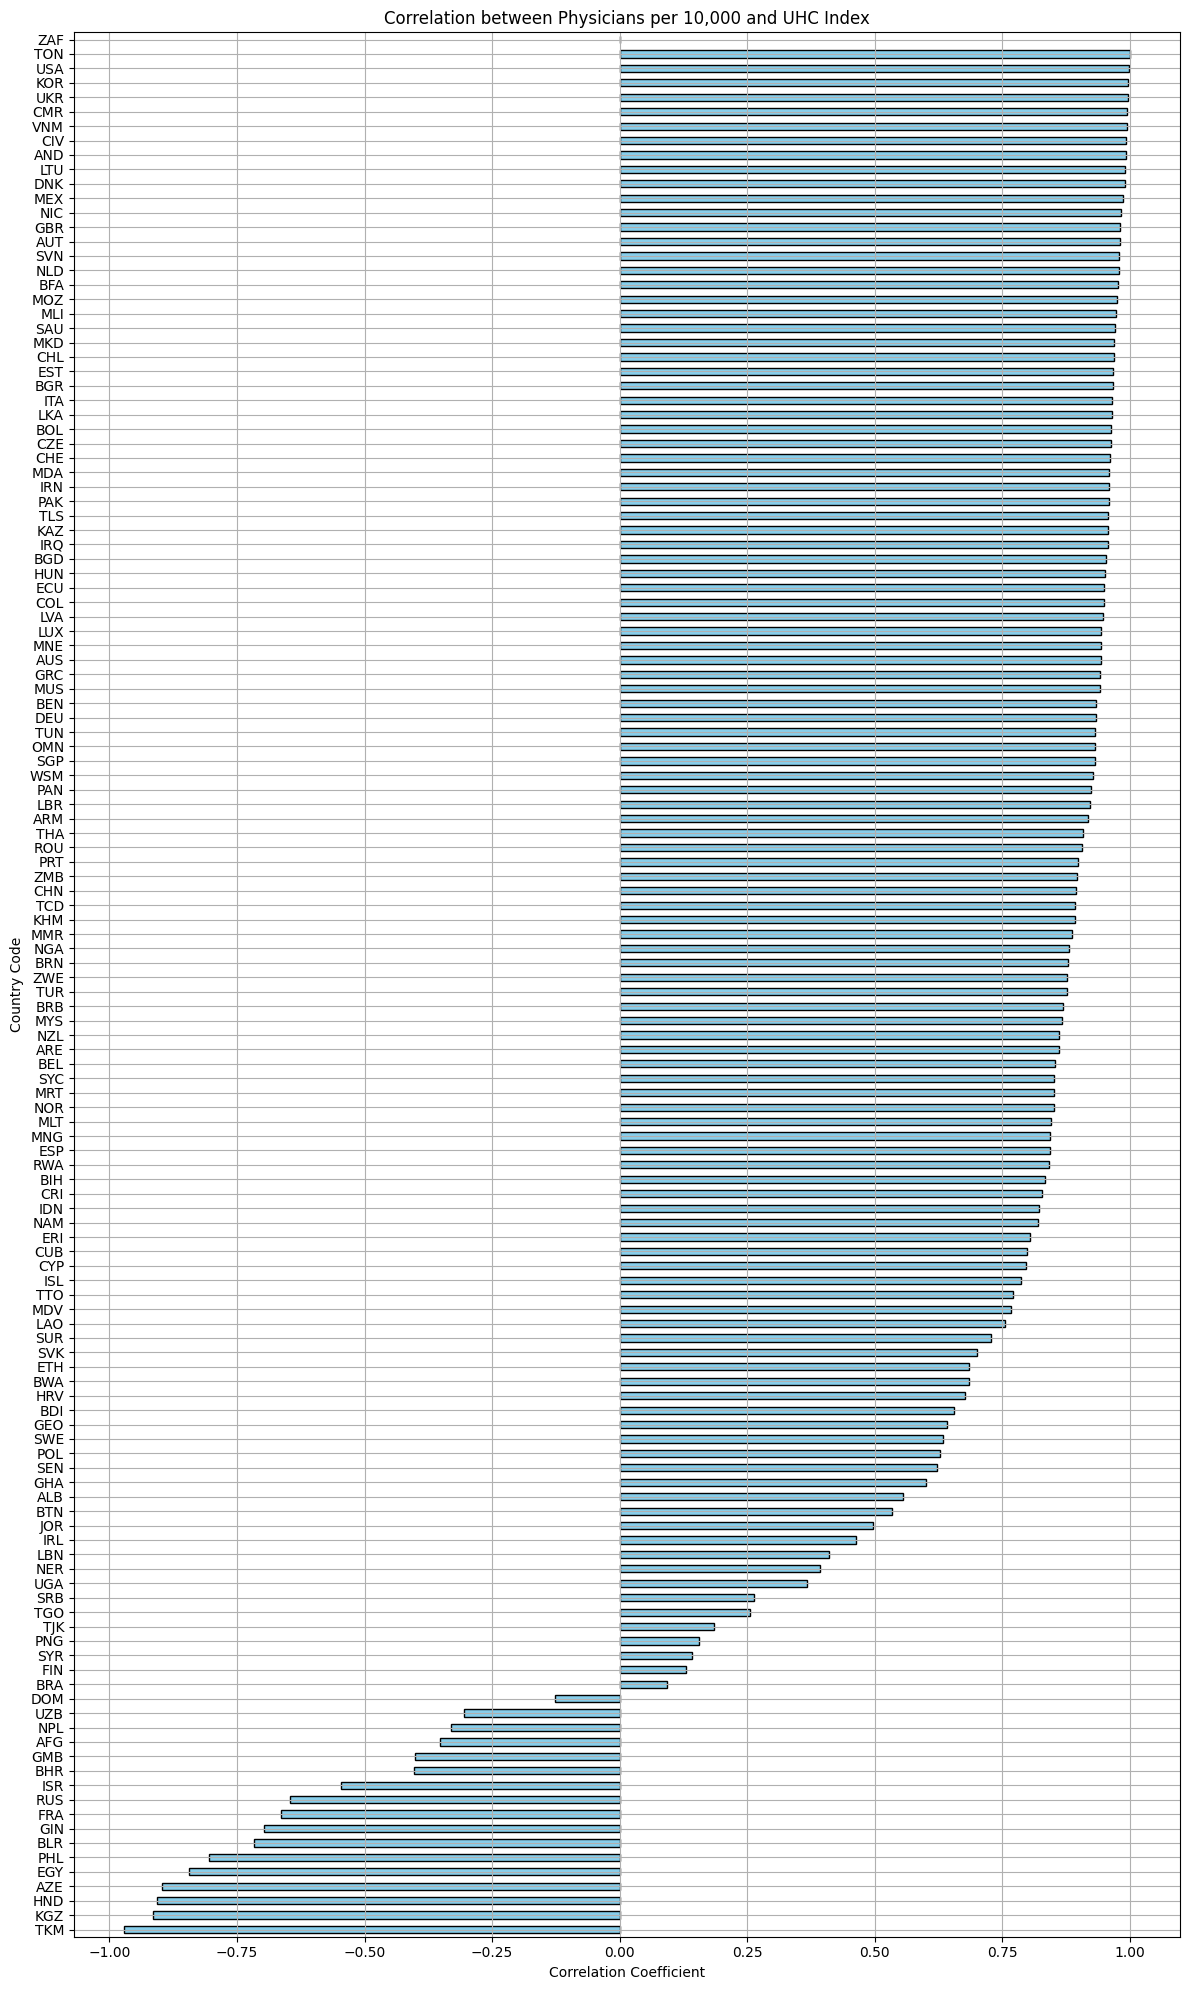

In [9]:
country_correlations_sorted = country_correlations.sort_values()

# Create a horizontal bar chart
plt.figure(figsize=(12, 20))
country_correlations_sorted.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Correlation between Physicians per 10,000 and UHC Index')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Country Code')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [10]:
percentage_corrs_above_80 = sum(country_correlations > 0.8) / len(country_correlations)
percentage_corrs_above_80

0.6287878787878788

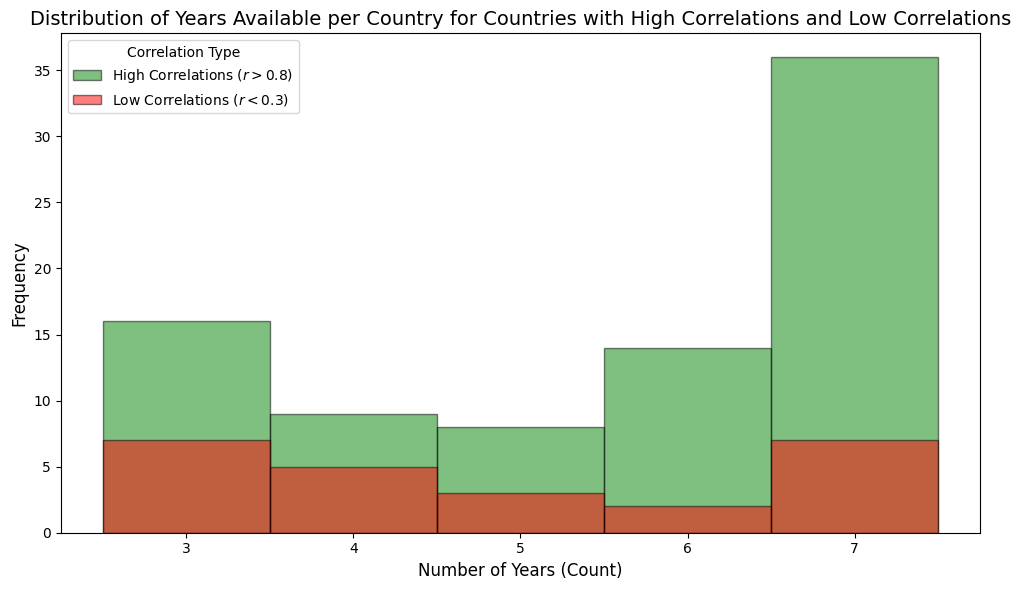

In [11]:
countries_low_corr = list(country_correlations[country_correlations < 0.3].index)
health_low_corr = health[health['CountryCode'].isin(countries_low_corr)].groupby('CountryCode').agg({'Year':len})
health_low_corr = health_low_corr.rename(columns={'Year':'Year Count'}).sort_values('Year Count')
health_low_corr.head(10)

countries_high_corr = list(country_correlations[country_correlations > 0.8].index)
health_high_corr = health[health['CountryCode'].isin(countries_high_corr)].groupby('CountryCode').agg({'Year':len})
health_high_corr = health_high_corr.rename(columns={'Year':'Year Count'}).sort_values('Year Count')
health_high_corr.head(10)

plt.figure(figsize=(10, 6))
plt.hist(health_high_corr['Year Count'], bins=np.arange(2.5, 8, 1), edgecolor='black', alpha=0.5, label=r"High Correlations ($r > 0.8$)", color='green')

plt.hist(health_low_corr['Year Count'], bins=np.arange(2.5, 8, 1), edgecolor='black', alpha=0.5,  label=r"Low Correlations ($r < 0.3$)", color='red')

# Add labels and title
plt.title('Distribution of Years Available per Country for Countries with High Correlations and Low Correlations', fontsize=14)
plt.xlabel('Number of Years (Count)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Correlation Type')

# Show the plot
plt.tight_layout()
plt.show()

## Correlation by Yearly Mean

In [12]:
yearly_data = health.groupby('Year')[['UHC_Std','PHYSPC_Std']].mean()
correlation = yearly_data.corr().iloc[0, 1]
correlation

0.8148297097619779